# 🧪 Bayesian A/B Testing: Conversion Rates

This notebook simulates A/B test results and applies a Bayesian method to estimate the probability that the variant (B) is better than the control (A).

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

## 🎲 Simulate Conversion Data

In [2]:
# Simulated data: binomial observations
n_A = 1000
conversions_A = 120

n_B = 1000
conversions_B = 138

print(f"A: {conversions_A}/{n_A} ({conversions_A/n_A:.2%})")
print(f"B: {conversions_B}/{n_B} ({conversions_B/n_B:.2%})")

A: 120/1000 (12.00%)
B: 138/1000 (13.80%)


## 📐 Bayesian _a posteriori_ Sampling (Beta Priors)

In [3]:
# Prior: Beta(1, 1) — uniform prior (non-informative)
# Posterior: Beta(alpha + successes, beta + failures)

samples = 100000
posterior_A = np.random.beta(1 + conversions_A, 1 + n_A - conversions_A, samples)
posterior_B = np.random.beta(1 + conversions_B, 1 + n_B - conversions_B, samples)

# Probability that B > A
prob_B_better = np.mean(posterior_B > posterior_A)
lift = (posterior_B - posterior_A) / posterior_A

print(f"P(B > A): {prob_B_better:.3f}")
print(f"Mean relative lift: {np.mean(lift)*100:.2f}%")

P(B > A): 0.885
Mean relative lift: 15.72%


## 📊 Visualize Posterior Distributions

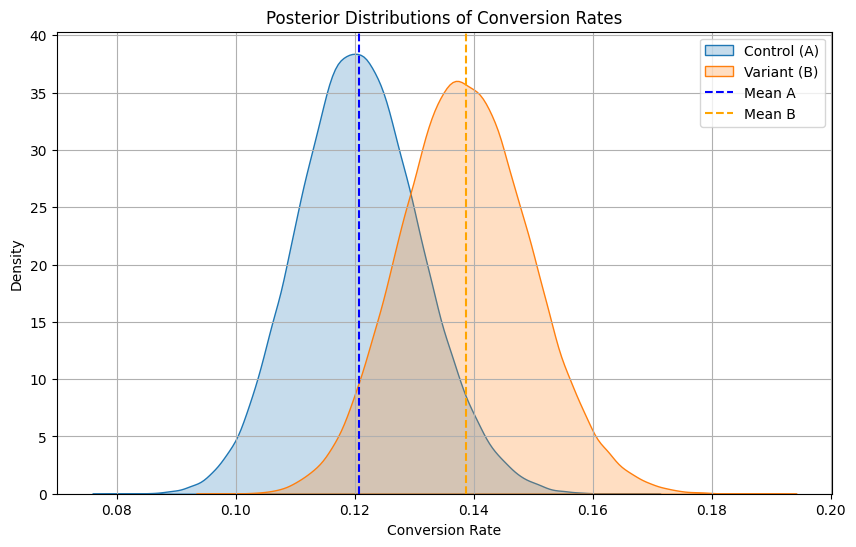

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(posterior_A, label="Control (A)", fill=True)
sns.kdeplot(posterior_B, label="Variant (B)", fill=True)
plt.axvline(np.mean(posterior_A), color='blue', linestyle='--', label='Mean A')
plt.axvline(np.mean(posterior_B), color='orange', linestyle='--', label='Mean B')
plt.title("Posterior Distributions of Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.savefig("../assets/posterior_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

## 🎯 Interpretation

- The posterior probability that B is better than A is `P(B > A)`.
- If this probability is high (e.g., > 95%), we might decide B is a worthwhile improvement.
- The *lift* shows how much better B performs than A on average.

In this simulation, the difference is not dramatic. A product decision might still depend on cost, user experience, and business goals.